#离散傅里叶变换
##描述
傅里叶变换时图像处理的重要部分，他将图像的分解成cos和sin分量。变换的结果就是在频域当中的图像表示。在傅里叶域，每个像素都表示了，在空域图像中包含的一个固定的频率。
##工作原理
由于我们计算的是图像，所以只考虑离散的情况：离散傅里叶变换（DFT）

DFT是经过采样（简化）的傅里叶变换，并未包含图像中所有的频率。但是采样的集合足以完整的描述空域的图像。

频率的数量和像素的数量相同。ie.在空域的图像尺寸，和傅里叶域的尺寸一样。

对于一张$N*N$的图像，它的二维DFT变换表示为：
$$F(k,l)=\sum^{N-1}_{i=0}\sum^{N-1}_{j=0}f(i,j)e^{-\iota2\pi(\frac{ki}{N}+\frac{kj}{N})}$$
f(a,b)是空域中的值，指数项（e）是每个频域点F(k,l)在不同像素点的基函数。

这个等式可以解释为Z（DFT）：频域每一个点，都是通过空域图像和相应基函数相乘并求和而得到的。

基函数是频率递增的sin或cos波，例如：F（0，0），表示DF成分的平均亮度，F（N-1,N-1)则表示最高频的成分。



In [1]:
import skimage
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from skimage import color
from skimage import io

from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] #指定默认字体

Populating the interactive namespace from numpy and matplotlib


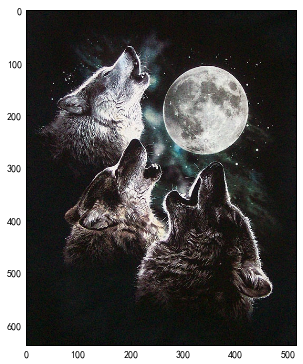

In [3]:
img = io.imread("3wolfmoon.jpg")

plt.figure(figsize=(8,6), dpi=80)
plt.imshow(img)

In [4]:
img_lab = color.rgb2lab(img)

print u'Lab空间参数'
print img_lab.shape ,img_lab.dtype
print img_lab[:,:,0].min() , img_lab[:,:,0].max()
print img_lab[:,:,1].min() , img_lab[:,:,1].max()
print img_lab[:,:,2].min() , img_lab[:,:,2].max()

Lab空间参数
(639L, 516L, 3L) float64
0.0 100.0
-23.373241847 20.5018262924
-21.0168949234 24.938527034


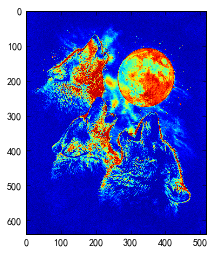

In [6]:
img_gray = img_lab[:,:,0]
b = np.fft.fftn(img_gray)
c = np.fft.ifftn(b).real
plt.imshow(c)

np.fft.